<a href="https://colab.research.google.com/github/codeguy186/ML-and-DL/blob/main/TF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Deep learning classification problem
#creating data
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)
x,y
#binary classification

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [2]:
import pandas as pd
circles=pd.DataFrame({'x0':x[:,0],'x1':x[:,1],'label':y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


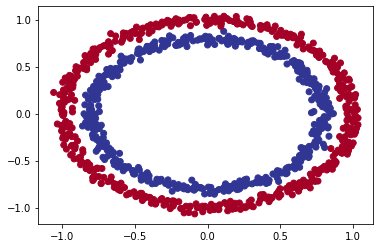

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [4]:
x.shape,y.shape

((1000, 2), (1000,))

In [5]:
#create model for binary classification
import tensorflow as tf
tf.random.set_seed(42)
model1=tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])
model1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [6]:
model1.fit(x,y,epochs=200,verbose=0)
model1.evaluate(x,y)
#not very good accuracy

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [7]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(1)
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])
model2.fit(x,y,epochs=100,verbose=0)
model2.evaluate(x,y)
#still bad accuracy

32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5000


[0.6944495439529419, 0.5]

In [8]:
#visualizing the predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())




doing binary classification...


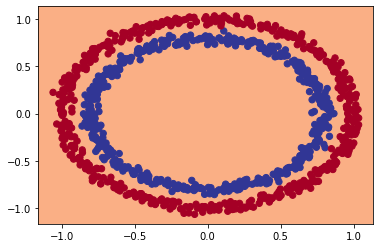

In [9]:
plot_decision_boundary(model2,x,y)

In [10]:
#create a model and add activation function
tf.random.set_seed(42)
model3=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1)
])
#compile a model and choose better optimization function and learning rate
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#fit the model and adjust epochs
model3.fit(x,y,epochs=1000,verbose=0)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
doing binary classification...


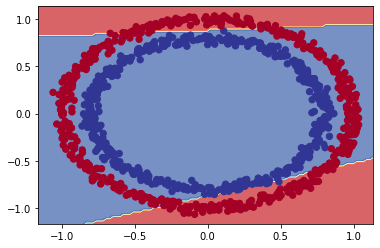

In [11]:
model3.evaluate(x,y)
plot_decision_boundary(model3,x,y)

In [12]:
tf.random.set_seed(42)
model4=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')#sigmoid for output of binary classification
])
#compile a model and choose better optimization function and learning rate
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#fit the model and adjust epochs
model4.fit(x,y,epochs=1000,verbose=0)

32/32 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.9960
doing binary classification...


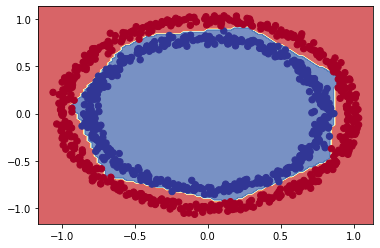

In [13]:
model4.evaluate(x,y)
plot_decision_boundary(model4,x,y)
#much more accurate model

In [14]:
a=tf.cast(tf.range(-10,10),tf.float32)

tf.Tensor(
[4.5399931e-05 1.2338161e-04 3.3542514e-04 9.1105700e-04 2.4726391e-03
 6.6929162e-03 1.7986238e-02 4.7425866e-02 1.1920291e-01 2.6894143e-01
 5.0000000e-01 7.3105860e-01 8.8079709e-01 9.5257413e-01 9.8201376e-01
 9.9330711e-01 9.9752736e-01 9.9908894e-01 9.9966455e-01 9.9987662e-01], shape=(20,), dtype=float32)


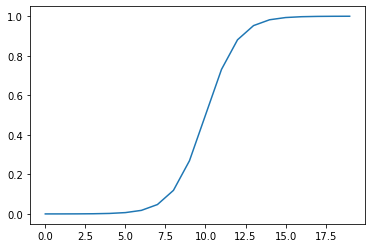

In [15]:
plt.plot(tf.keras.activations.sigmoid(a))
print(tf.keras.activations.sigmoid(a))

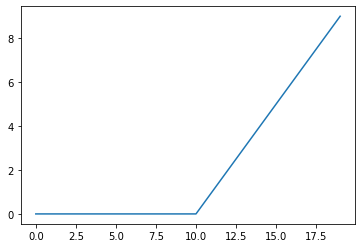

In [16]:
plt.plot(tf.keras.activations.relu(a))

In [17]:
#split data set to train and test different datasets
x_train,y_train=x[:800],y[:800]
x_test,y_test=x[800:],y[800:]


In [18]:
tf.random.set_seed(42)
model5=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')#sigmoid for output of binary classification
])
#compile a model and choose better optimization function and learning rate
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
#fit the model and adjust epochs
history=model5.fit(x_train,y_train,epochs=30,verbose=0)

7/7 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9750
doing binary classification...


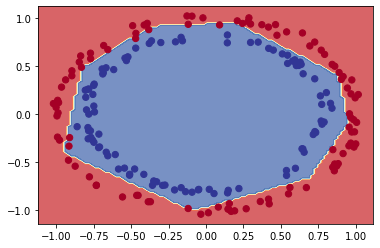

In [19]:
model5.evaluate(x_test,y_test)
plot_decision_boundary(model5,x_test,y_test)

In [20]:
#plotting loss curve
h=pd.DataFrame(history.history)
h.head()

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500


Text(0.5, 1.0, 'loss curve')

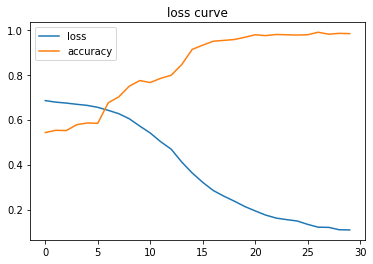

In [21]:
h.plot()
plt.title("loss curve")

In [22]:
#Finding the ideal learning rate
tf.random.set_seed(42)
model6=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model6.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
history6=model6.fit(x_train,y_train,epochs=50,callbacks=[lr_scheduler])


Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/50
25/25 [

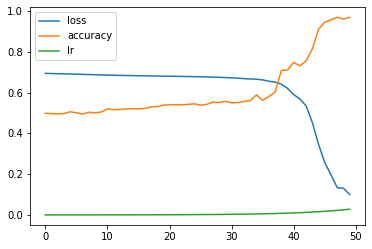

In [23]:
pd.DataFrame(history6.history).plot()

Text(0, 0.5, 'loss')

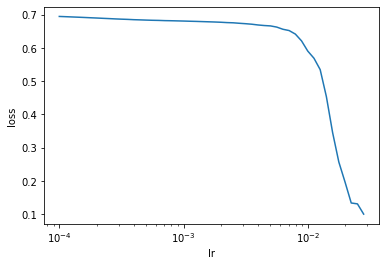

In [24]:
#plot lr vs loss
lrs=1e-4*10**(tf.range(50)/20)
plt.semilogx(lrs,history6.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')

doing binary classification...


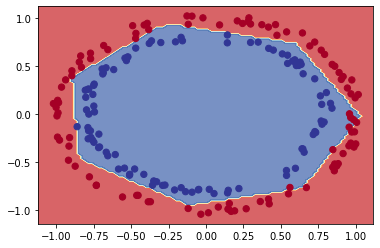

In [25]:
plot_decision_boundary(model6,x_test,y_test)

In [26]:
#More classification metrics
#accuracy
loss,accuracy=model6.evaluate(x_test,y_test)
print(accuracy)
print(loss)

7/7 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9700
0.9700000286102295
0.09174992889165878


In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=model6.predict(x_test)





In [28]:
#convert y_pred to 0s and 1s
y_pred=tf.round(y_pred)
cm=confusion_matrix(y_test,y_pred)
cm


array([[95,  6],
       [ 0, 99]])

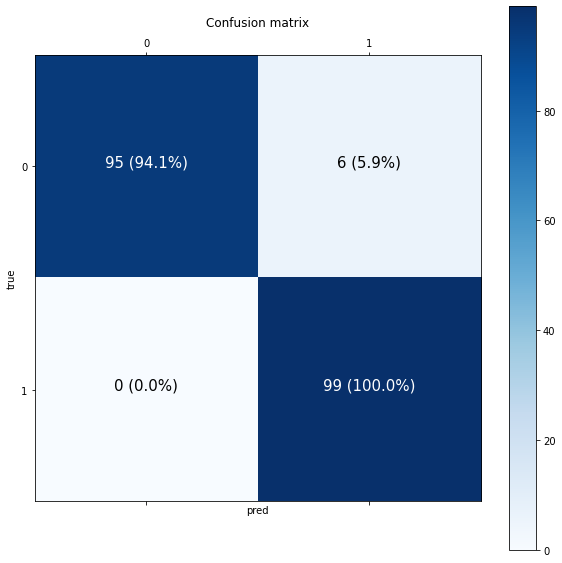

In [29]:
#making cm look better
import itertools
def conf_mat(y_true,y_pred,classes=None,figsize=(10,10)):
  size=(10,10)
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]#normalizing
  n_classes=cm.shape[0]
  fig,ax=plt.subplots(figsize=size)
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  if classes:
    labels=classes
  else:
    labels=np.arange(n_classes)
  ax.set(title="Confusion matrix",xlabel="pred",ylabel="true",xticks=np.arange(n_classes),yticks=np.arange(n_classes),xticklabels=labels,yticklabels=labels)
  #threshld for diff colors
  threshold=(cm.max()+cm.min())/2

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i,j]>threshold else 'black',
            size=15)
conf_mat(y_test,y_pred)



In [30]:
#Multiclass Classification
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [31]:
print("training sample\n:",train_data[0])
print("training label\n:",train_labels[0])

training sample
: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [32]:
#training label 9 :ankle boot
train_data[0].shape


(28, 28)

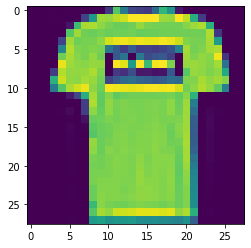

In [33]:
plt.imshow(train_data[1])

In [34]:
train_labels[1]
#label 0: t-shirt

0

Text(0.5, 1.0, 'pullover')

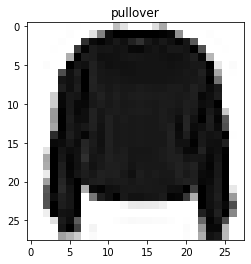

In [35]:
class_names=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
plt.imshow(train_data[7],cmap=plt.cm.binary)
plt.title(class_names[train_labels[7]])


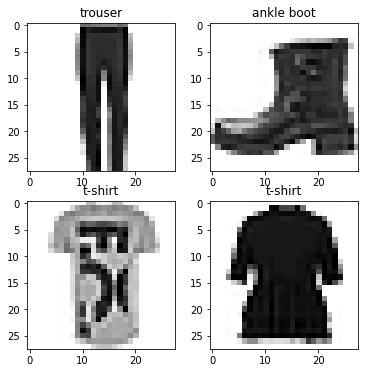

In [36]:
#plot multiple random images
import random
plt.figure(figsize=(6,6))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

Input shape=28x28(shape of one img),
output shape=1


In [37]:
#Building multiclass model
tf.random.set_seed(42)
model7=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#flattens output to a vector(only columns) [28*28-->none*784]
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')
])
model7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='Adam',metrics='accuracy')#use sparsecatcrossentropy for integer data
history=model7.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))#catcrossentropy requires one hot encoded data

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [38]:
#scaling to improve model
train_data.min(),train_data.max()
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [39]:
tf.random.set_seed(42)
model8=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#flattens output to a vector(only columns) [28*28-->none*784]
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')
])
model8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='Adam',metrics='accuracy')#use sparsecatcrossentropy for integer data
norm_history=model8.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))#catcrossentropy requires one hot encoded data
#MUCH BETTER ACCURACY

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

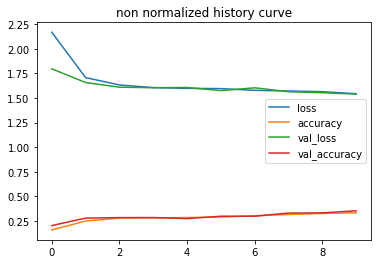

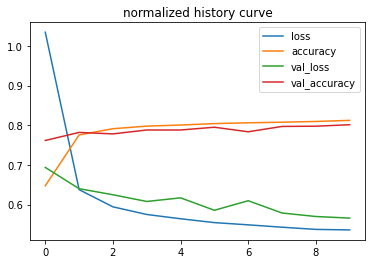

In [40]:

pd.DataFrame(history.history).plot(title='non normalized history curve')
pd.DataFrame(norm_history.history).plot(title='normalized history curve')

In [92]:
#finding ideal lr
tf.random.set_seed(42)
model9=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#flattens output to a vector(only columns) [28*28-->none*784]
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')
])
model9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='Adam',metrics='accuracy')#use sparsecatcrossentropy for integer data
lr_scheduler2=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
lr_history=model9.fit(train_data_norm,
                      tf.one_hot(train_labels,depth=10),
                      epochs=20,
                      verbose=1,
                      validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                      callbacks=[lr_scheduler2])#catcrossentropy requires one hot encoded data


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0, 0.5, 'loss')

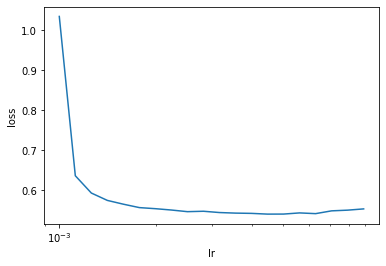

In [94]:
lrs2=1e-3*10**(tf.range(20)/20)
plt.semilogx(lrs2,lr_history.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')

In [95]:
#Evaluating model
y_probs=model9.predict(test_data_norm)
y_probs[0],tf.argmax(y_probs[0])#predict on same kind of data that model was trained on


(array([1.2742422e-09, 5.3467939e-08, 8.3849936e-06, 7.0589194e-06,
        9.7621414e-06, 5.4065306e-02, 7.2848763e-08, 6.3599236e-02,
        1.8366773e-03, 8.8047338e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [96]:
class_names[tf.argmax(y_probs[0])]

'ankle boot'

In [97]:
y_pred2=y_probs.argmax(axis=1)
y_pred2[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [98]:
test_labels[:10]==y_pred2[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

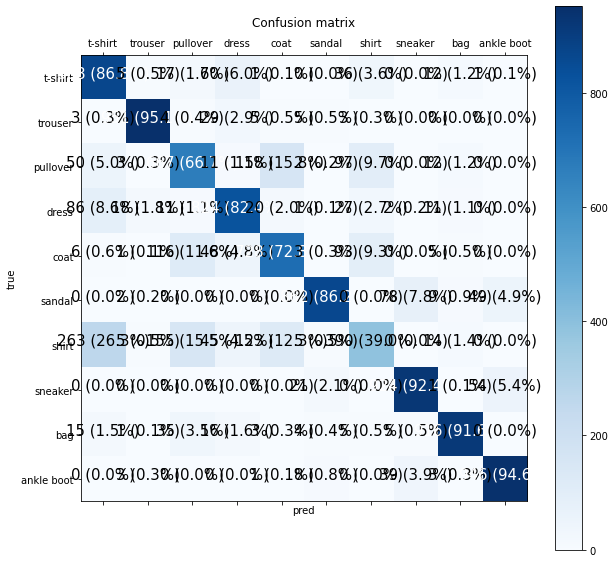

In [99]:
conf_mat(test_labels,y_pred2,class_names,figsize=(50,50))

In [100]:
import random
def plot_random_img(model,images,true_labels,classes):
  i=random.randint(0,len(images))
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]
  plt.imshow(target_image,cmap=plt.cm.binary)
  if pred_label==true_label:
    color='green'
  else:
    color='red'
  plt.xlabel("pred:{} {:2.0f}% (True:{})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)


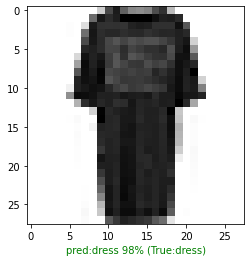

In [101]:
plot_random_img(model9,test_data_norm,test_labels,class_names)

In [102]:
#Patterns the model learns
model9.layers

In [103]:
l=model9.layers[1]
weights,biases=l.get_weights()
weights,weights.shape

(array([[ 3.0885503 , -2.430857  ,  0.45438388, -3.0628507 ],
        [ 0.98286426, -2.71804   , -0.38760266, -1.1560956 ],
        [ 2.6185486 , -1.6931161 , -2.659585  , -2.343221  ],
        ...,
        [-0.5499583 ,  2.1220326 , -0.22042169,  0.75220233],
        [-0.5888785 ,  3.346401  ,  1.4520893 , -1.5131956 ],
        [ 0.90688974, -0.6245389 ,  0.64969605,  0.05348392]],
       dtype=float32), (784, 4))